# PREDICTION OF PRICE OF HOUSES

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns

In [72]:
df = pd.read_csv('House_Price.csv')

In [73]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


# Extended Data Dictionary for univariate analysis

In [74]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677082,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


# Filling the missing values

In [75]:
df = df.fillna(df.mean())

# Finding and treating the outliers
As we can see in the EDD the max value of crime_rate is much larger then the 75 percentile value so we first check for the outlier in it by plotting its joint plot with the help of seaborn liabrary.

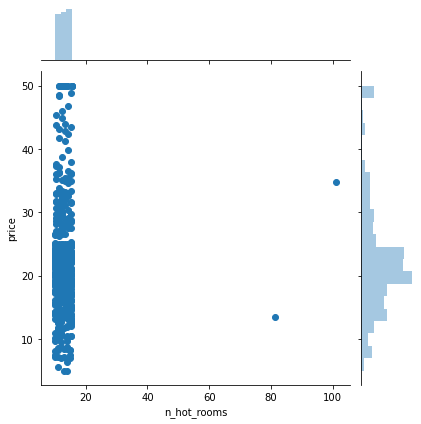

In [76]:
sns.jointplot(x = 'n_hot_rooms',y = 'price',data = df)

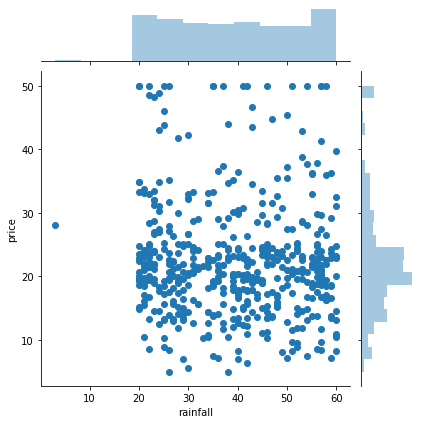

In [77]:
sns.jointplot(x = 'rainfall',y = 'price',data = df)

In [78]:
prcntle = np.percentile(df['n_hot_rooms'],[99])[0]

In [79]:
df.n_hot_rooms[(df.n_hot_rooms>2*prcntle)]= 2*prcntle

<ipython-input-79-388a6a00f032>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.n_hot_rooms[(df.n_hot_rooms>2*prcntle)]= 2*prcntle


In [80]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.803182,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.464939,2.024593,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507
75%,25.000000,3.677082,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,30.799040,60.000000,0.086711


In [81]:
prcntle_r = np.percentile(df['rainfall'],[1])[0]

In [82]:
df.rainfall[(df.rainfall<0.3*prcntle)]= 0.3*prcntle

<ipython-input-82-3af0f748f772>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rainfall[(df.rainfall<0.3*prcntle)]= 0.3*prcntle


# Finding the influence of every independent variables on price using their correlation value

In [83]:
df.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
price,1.000000,-0.389582,-0.484754,-0.429300,0.696304,-0.377999,0.251355,0.249459,0.246650,0.248200,0.505655,-0.740836,0.108880,0.017596,-0.047305,-0.391574
crime_rate,-0.389582,1.000000,0.406583,0.420972,-0.219247,0.352734,-0.380050,-0.379813,-0.380069,-0.376462,-0.289946,0.455621,0.017371,0.043990,0.059143,0.383235
resid_area,-0.484754,0.406583,1.000000,0.763651,-0.391676,0.644779,-0.706481,-0.707956,-0.707566,-0.705819,-0.383248,0.603800,0.005799,-0.011354,0.055830,0.707635
air_qual,-0.429300,0.420972,0.763651,1.000000,-0.302188,0.731470,-0.768589,-0.769724,-0.769157,-0.764873,-0.188933,0.590879,-0.049553,0.013043,0.092025,0.915544
room_num,0.696304,-0.219247,-0.391676,-0.302188,1.000000,-0.240265,0.208464,0.203981,0.201907,0.205397,0.355501,-0.613808,0.032009,0.003959,-0.064708,-0.282817
age,-0.377999,0.352734,0.644779,0.731470,-0.240265,1.000000,-0.746904,-0.746493,-0.747021,-0.746707,-0.261515,0.602339,-0.021012,0.013642,0.074922,0.673850
dist1,0.251355,-0.380050,-0.706481,-0.768589,0.208464,-0.746904,1.000000,0.997905,0.997735,0.994073,0.232834,-0.498823,-0.030365,-0.027773,-0.036804,-0.706319
dist2,0.249459,-0.379813,-0.707956,-0.769724,0.203981,-0.746493,0.997905,1.000000,0.998097,0.994003,0.233707,-0.495693,-0.031071,-0.023970,-0.037997,-0.708237
dist3,0.246650,-0.380069,-0.707566,-0.769157,0.201907,-0.747021,0.997735,0.998097,1.000000,0.994126,0.233588,-0.494290,-0.028315,-0.022493,-0.041473,-0.709346
dist4,0.248200,-0.376462,-0.705819,-0.764873,0.205397,-0.746707,0.994073,0.994003,0.994126,1.000000,0.228256,-0.496084,-0.021534,-0.018397,-0.032572,-0.703508


we can drop the variables with lower correlation values.
The variables with the lower corretion values are as follows:
1. n_hos_beds
2. n_hot_rooms
3. rainfall

So we can drop them for the better prediction

In [84]:
del df['rainfall']
del df['n_hot_rooms']
del df['n_hos_beds']

### Now we have to change the variables with categorical values in the form of 0 and 1 by making them dummy variables

In [85]:
df = pd.get_dummies(df)

In [87]:
del df['airport_NO']

In [88]:
del df['waterbody_None']

# Now we can use the average distance instead of the four distances 

In [89]:
# Make a new variable in which we store the average distances
df['avg_dist'] = (df.dist1+df.dist2+df.dist3+df.dist4)/4

In [95]:
del df['dist1']

In [96]:
del df['dist2']
del df['dist3']
del df['dist4']

In [98]:
df.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,parks,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River,bus_ter_YES,avg_dist
price,1.000000,-0.389582,-0.484754,-0.429300,0.696304,-0.377999,0.505655,-0.740836,-0.391574,0.182867,0.036233,-0.037497,0.071751,NaN,0.249289
crime_rate,-0.389582,1.000000,0.406583,0.420972,-0.219247,0.352734,-0.289946,0.455621,0.383235,-0.086805,-0.016894,-0.018150,-0.037123,NaN,-0.379673
resid_area,-0.484754,0.406583,1.000000,0.763651,-0.391676,0.644779,-0.383248,0.603800,0.707635,-0.115401,-0.026590,0.051649,-0.098976,NaN,-0.708022
air_qual,-0.429300,0.420972,0.763651,1.000000,-0.302188,0.731470,-0.188933,0.590879,0.915544,-0.073903,-0.046393,0.013849,-0.037772,NaN,-0.769247
room_num,0.696304,-0.219247,-0.391676,-0.302188,1.000000,-0.240265,0.355501,-0.613808,-0.282817,0.163774,-0.004195,0.010554,0.046251,NaN,0.205241
age,-0.377999,0.352734,0.644779,0.731470,-0.240265,1.000000,-0.261515,0.602339,0.673850,0.005101,0.003452,-0.004354,-0.088609,NaN,-0.747906
teachers,0.505655,-0.289946,-0.383248,-0.188933,0.355501,-0.261515,1.000000,-0.374044,-0.187004,0.069437,0.048717,-0.046981,0.094256,NaN,0.232452
poor_prop,-0.740836,0.455621,0.603800,0.590879,-0.613808,0.602339,-0.374044,1.000000,0.552310,-0.095054,0.003197,0.020620,-0.109004,NaN,-0.496967
parks,-0.391574,0.383235,0.707635,0.915544,-0.282817,0.673850,-0.187004,0.552310,1.000000,-0.052503,-0.034991,0.013265,-0.048862,NaN,-0.707924
airport_YES,0.182867,-0.086805,-0.115401,-0.073903,0.163774,0.005101,0.069437,-0.095054,-0.052503,1.000000,0.035491,-0.070341,0.017341,NaN,0.021402


In [99]:
del df['airport_YES']
del df['waterbody_Lake']
del df['waterbody_Lake and River']
del df['waterbody_River']
del df['bus_ter_YES']

## Cleaned data

In [100]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,parks,avg_dist
0,24.0,0.00632,32.31,0.538,6.575,65.2,24.7,4.98,0.049347,4.0875
1,21.6,0.02731,37.07,0.469,6.421,78.9,22.2,9.14,0.046146,4.9675
2,34.7,0.02729,37.07,0.469,7.185,61.1,22.2,4.03,0.045764,4.9675
3,33.4,0.03237,32.18,0.458,6.998,45.8,21.3,2.94,0.047151,6.0650
4,36.2,0.06905,32.18,0.458,7.147,54.2,21.3,5.33,0.039474,6.0625


# Now our data is clean and ready to apply our prediction model
We will use first simple linear regression model by using the most efficient independent variable

In [90]:
from sklearn.linear_model import LinearRegression

### Now we fill find the most impactful variable which has highest impact on price

In [101]:
df.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,parks,avg_dist
price,1.000000,-0.389582,-0.484754,-0.429300,0.696304,-0.377999,0.505655,-0.740836,-0.391574,0.249289
crime_rate,-0.389582,1.000000,0.406583,0.420972,-0.219247,0.352734,-0.289946,0.455621,0.383235,-0.379673
resid_area,-0.484754,0.406583,1.000000,0.763651,-0.391676,0.644779,-0.383248,0.603800,0.707635,-0.708022
air_qual,-0.429300,0.420972,0.763651,1.000000,-0.302188,0.731470,-0.188933,0.590879,0.915544,-0.769247
room_num,0.696304,-0.219247,-0.391676,-0.302188,1.000000,-0.240265,0.355501,-0.613808,-0.282817,0.205241
age,-0.377999,0.352734,0.644779,0.731470,-0.240265,1.000000,-0.261515,0.602339,0.673850,-0.747906
teachers,0.505655,-0.289946,-0.383248,-0.188933,0.355501,-0.261515,1.000000,-0.374044,-0.187004,0.232452
poor_prop,-0.740836,0.455621,0.603800,0.590879,-0.613808,0.602339,-0.374044,1.000000,0.552310,-0.496967
parks,-0.391574,0.383235,0.707635,0.915544,-0.282817,0.673850,-0.187004,0.552310,1.000000,-0.707924
avg_dist,0.249289,-0.379673,-0.708022,-0.769247,0.205241,-0.747906,0.232452,-0.496967,-0.707924,1.000000


##### we will choose "poor_prop" as independent variable

In [121]:
x = df[['poor_prop']]

In [122]:
y = df['price']

In [123]:
lm = LinearRegression()

In [124]:
lm.fit(x,y)

LinearRegression()

In [125]:
y_pred = lm.predict(x)

In [126]:
y_pred

array([29.83811837, 25.87535411, 30.74307656, 31.781397  , 29.50471272,
       29.61902323, 22.74134102, 16.3399526 ,  6.07105866, 18.2927571 ,
       15.10158877, 21.94116747, 19.61685382, 26.71363116, 24.80845604,
       26.51358778, 28.31397827, 20.60754488, 23.44625582, 23.83681672,
       14.55861385, 21.40771844, 16.74956525, 15.64456368, 19.05482715,
       18.85478377, 20.47418262, 18.12129134, 22.38888363, 23.17000543,
       13.0535255 , 22.16026261,  8.18580305, 17.10202265, 15.2063734 ,
       25.36095682, 23.71298034, 26.22781151, 24.93229242, 30.46682616,
       32.69588106, 29.97148063, 29.04747069, 27.49475297, 25.48479321,
       24.85608542, 21.10289042, 16.67335825,  5.23278161, 19.15008591,
       21.76970171, 25.59910371, 29.5523421 , 26.55169128, 20.4837085 ,
       30.00005826, 29.0855742 , 30.81928356, 28.04725375, 25.7991471 ,
       22.05547798, 20.82664002, 28.17109014, 25.53242259, 26.91367455,
       30.13342052, 24.82750779, 26.86604517, 22.11263323, 26.20

In [127]:
from sklearn.metrics import r2_score

In [128]:
r2_score(y,y_pred)

0.5488379682040347